# 1. Load Data for Clustering

In [1]:
import numpy as np
import pandas as pd
m2 = pd.read_csv('data_clustering.csv',dtype={'CLNT_ID':str})
m2=m2[['ACTIVE_DAYS', 'N_LOGIN', 'PURCHASE_CYCLE', 'SESS_SEQ',
       'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'TOTAL_BUY_AM_x', 'TOTAL_BUY_AM_y',
       'TOTAL_CT', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'CLNT_GENDER', 'CLNT_AGE']]
CUSM2=pd.read_csv('data_regression.csv',dtype={'CLNT_ID':str})
CUSM2=CUSM2.loc[:,'CLNT_ID']
m2.index=CUSM2.index
m2=pd.concat([CUSM2, m2], axis=1)
m2.head()

,CLNT_ID,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,0000008,118,2,59.0,4.5,46.500000,417.000000,38000.000000,76000,2,...,0,0,0,0,0,0,2,0,M,20
1,0000014,20,1,20.0,5.0,256.000000,7098.000000,34900.000000,69800,2,...,0,0,0,0,0,0,2,0,F,30
2,0000032,20,2,10.0,101.4,98.200000,2169.000000,15360.000000,76800,5,...,0,0,0,0,0,0,5,0,M,40
3,0000056,97,2,48.5,82.0,45.666667,1157.666667,7933.333333,23800,3,...,0,0,0,0,1,0,0,2,F,40
4,0000058,74,1,74.0,8.0,195.000000,3161.000000,21850.000000,131100,6,...,0,1,0,0,0,0,5,0,F,30


# 2. Clustering

In [2]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### - 20대 남성 Cluster

In [7]:
cluster = m2.loc[(m2['CLNT_GENDER']=='M') & (m2['CLNT_AGE']==20)]
cluster.head()

,CLNT_ID,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,0000008,118,2,59.000000,4.5,46.50,417.0,38000.0,76000,2,...,0,0,0,0,0,0,2,0,M,20
26,0000215,29,3,9.666667,12.0,293.75,1522.5,62030.0,248120,4,...,0,3,0,0,0,0,0,0,M,20
74,0000662,31,1,31.000000,6.0,59.00,2250.0,99500.0,199000,2,...,0,0,0,0,0,0,2,0,M,20
91,0000780,89,2,44.500000,119.5,52.00,507.5,74000.0,148000,4,...,0,0,0,0,0,0,0,4,M,20
154,0001209,169,1,169.000000,9.0,34.00,587.0,29260.0,58520,2,...,0,0,0,0,0,0,2,0,M,20


In [8]:
CLNT_ID=cluster['CLNT_ID']
cluster = cluster.drop(['CLNT_ID','CLNT_GENDER','CLNT_AGE'], axis=1)
cluster.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,118,2,59.000000,4.5,46.50,417.0,38000.0,76000,2,0.0,...,0,0,0,0,0,0,0,0,2,0
26,29,3,9.666667,12.0,293.75,1522.5,62030.0,248120,4,0.0,...,0,1,0,3,0,0,0,0,0,0
74,31,1,31.000000,6.0,59.00,2250.0,99500.0,199000,2,0.0,...,0,0,0,0,0,0,0,0,2,0
91,89,2,44.500000,119.5,52.00,507.5,74000.0,148000,4,0.0,...,0,0,0,0,0,0,0,0,0,4
154,169,1,169.000000,9.0,34.00,587.0,29260.0,58520,2,0.0,...,0,0,0,0,0,0,0,0,2,0


In [9]:
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
mms = MinMaxScaler()
mms.fit(cluster) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster)

### * Choose the number of clusters

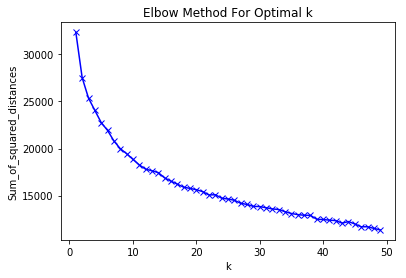

In [10]:
SSD = []

for k in range(1,50):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)
    
plt.plot(range(1,50), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### * 클러스터 특징 탐색

In [11]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출

cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster.columns
cluster_transformed.index = cluster.index
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,predict
0,0.642857,0.018868,0.318681,0.001658,0.091365,0.035825,0.002329,0.002329,0.001675,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714,0.000000,0
26,0.153846,0.037736,0.047619,0.005212,0.587851,0.131259,0.003806,0.007617,0.005025,0.0,...,0.142857,0.0,0.023077,0.0,0.0,0.0,0.0,0.000000,0.000000,0
74,0.164835,0.000000,0.164835,0.002369,0.116466,0.194061,0.006108,0.006108,0.001675,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714,0.000000,0
91,0.483516,0.018868,0.239011,0.056149,0.102410,0.043638,0.004541,0.004541,0.005025,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.068966,0
154,0.923077,0.000000,0.923077,0.003791,0.066265,0.050501,0.001792,0.001792,0.001675,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714,0.000000,2


In [12]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

# # predict clustering 4
# idx = np.where(cluster_transformed['predict'] == 3)
# cluster_3 = cluster.loc[cluster.index[idx]]

In [13]:
pd.DataFrame({"cluster0":round(cluster_0.mean(),2),"cluster1":round(cluster_1.mean(),2),"cluster2":round(cluster_2.mean(),2)})

,cluster0,cluster1,cluster2
ACTIVE_DAYS,105.85,107.16,95.26
N_LOGIN,1.96,1.89,1.57
PURCHASE_CYCLE,71.96,74.02,74.05
SESS_SEQ,34.03,28.36,23.80
TOT_PAG_VIEW_CT,80.59,75.03,78.86
TOT_SESS_HR_V,1220.35,1152.71,1188.16
TOTAL_BUY_AM_x,73064.39,83528.65,78275.09
TOTAL_BUY_AM_y,217049.84,240562.20,210542.58
TOTAL_CT,4.04,4.10,3.38
DVC_desktop,0.00,0.00,0.00


In [14]:
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [15]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum

CLAC0_0     2040
CLAC0_1     2019
CLAC0_2      957
CLAC0_3    12172
CLAC0_4     3700
CLAC0_5      520
CLAC0_6      785
CLAC0_7     1467
CLAC0_8    20979
CLAC0_9     5828
dtype: int64

<BarContainer object of 10 artists>

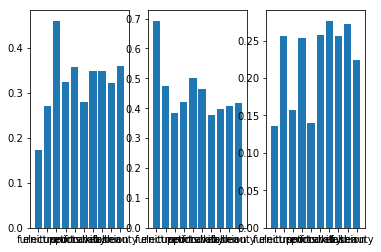

In [16]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 3)
plt.bar(labels, sum2/sum_of_sum)


In [17]:
clutering = pd.concat([sum0,sum1,sum2],axis=1)
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,labels
CLAC0_0,351,1413,276,furniture
CLAC0_1,545,957,517,electronic
CLAC0_2,440,366,151,pet
CLAC0_3,3947,5136,3089,sports
CLAC0_4,1324,1860,516,food
CLAC0_5,145,241,134,travel
CLAC0_6,273,295,217,baby
CLAC0_7,511,581,375,kitchen
CLAC0_8,6731,8545,5703,fashion
CLAC0_9,2091,2431,1306,beauty


# 3. Scoring

In [18]:
def scorefun(k, x, data, transformed_data, category) :

    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([k,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(transformed_data['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()).sum()
        cate_sum=clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
        cate_sum[cate_sum== 0] = 1        
        category_rate[kk] = log(cate_sum)/sum_of_sum

    
    distance_from_centers = [0] * k
    xdata=transformed_data.loc[x, :"weekend_weekend"]
    for i in range(k) :
        distance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - xdata)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/distance_from_centers[i])
    
    return sum(result)*100

In [19]:
cluster_transformed['CLNT_ID']=CLNT_ID

In [20]:
cluster_transformed.index=cluster_transformed['CLNT_ID']

In [21]:
cluster.index = cluster_transformed.index

In [22]:
cluster.index,cluster_transformed.index

(Index(['0000008', '0000215', '0000662', '0000780', '0001209', '0001627',
        '0001658', '0001914', '0001975', '0002362',
        ...
        '6589195', '6589393', '6589556', '6589864', '6590663', '6590684',
        '6591280', '6591801', '6591914', '6592145'],
       dtype='object', name='CLNT_ID', length=13019),
 Index(['0000008', '0000215', '0000662', '0000780', '0001209', '0001627',
        '0001658', '0001914', '0001975', '0002362',
        ...
        '6589195', '6589393', '6589556', '6589864', '6590663', '6590684',
        '6591280', '6591801', '6591914', '6592145'],
       dtype='object', name='CLNT_ID', length=13019))

In [23]:
# cluster['furniture_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,0))

In [24]:
cluster['furniture_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,0))
cluster['electronic_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,1))
cluster['pet_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,2))
cluster['sports_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,3))
cluster['food_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,4))
cluster['travel_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,5))
cluster['baby_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,6))
cluster['kitchen_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,7))
cluster['fashion_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,8))
cluster['beauty_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,9))

In [27]:
cluster.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,furniture_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,travel_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,118,2,59.000000,4.5,46.50,417.0,38000.0,76000,2,0.0,...,737.161083,766.377240,671.107235,982.230307,826.546270,606.136528,659.000559,731.966628,1047.944742,893.309323
0000215,29,3,9.666667,12.0,293.75,1522.5,62030.0,248120,4,0.0,...,691.949157,719.358228,629.872439,921.948630,775.791569,568.948758,618.550861,687.037085,983.632915,838.472193
0000662,31,1,31.000000,6.0,59.00,2250.0,99500.0,199000,2,0.0,...,645.895872,671.461432,587.870083,860.541168,724.092023,531.067027,577.345759,641.268779,918.119581,782.611673
0000780,89,2,44.500000,119.5,52.00,507.5,74000.0,148000,4,0.0,...,756.960751,786.961514,689.141129,1008.614203,848.753511,622.417044,676.702737,751.629168,1076.093170,917.306639
0001209,169,1,169.000000,9.0,34.00,587.0,29260.0,58520,2,0.0,...,570.616979,593.219447,519.355522,760.269136,639.701562,469.182805,510.072185,566.544978,811.141077,691.415947


In [28]:
#Save
cluster[['furniture_SCORE', 'electronic_SCORE', 'pet_SCORE', 'sports_SCORE',
       'food_SCORE', 'travel_SCORE', 'baby_SCORE', 'kitchen_SCORE',
       'fashion_SCORE', 'beauty_SCORE']].to_csv('M_20.csv',index=True)

# 4. New Scoring

In [29]:
cluster_Score=pd.read_csv('M_20.csv',dtype={'CLNT_ID':str})
cluster_Score.head()

,CLNT_ID,furniture_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,travel_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
0,0000008,737.161083,766.377240,671.107235,982.230307,826.546270,606.136528,659.000559,731.966628,1047.944742,893.309323
1,0000215,691.949157,719.358228,629.872439,921.948630,775.791569,568.948758,618.550861,687.037085,983.632915,838.472193
2,0000662,645.895872,671.461432,587.870083,860.541168,724.092023,531.067027,577.345759,641.268779,918.119581,782.611673
3,0000780,756.960751,786.961514,689.141129,1008.614203,848.753511,622.417044,676.702737,751.629168,1076.093170,917.306639
4,0001209,570.616979,593.219447,519.355522,760.269136,639.701562,469.182805,510.072185,566.544978,811.141077,691.415947


In [30]:
cluster_Score.index = cluster_Score['CLNT_ID']

In [31]:
#Ratio
m2['PD_BUY_CT2']=m2['CLAC0_0']+m2['CLAC0_1']+m2['CLAC0_2']+m2['CLAC0_3']+m2['CLAC0_4']+m2['CLAC0_4']+m2['CLAC0_5']+m2['CLAC0_6']+m2['CLAC0_7']+m2['CLAC0_8']+m2['CLAC0_9']
m2['C0_Ratio']=m2['CLAC0_0']/m2['PD_BUY_CT2']
m2['C1_Ratio']=m2['CLAC0_1']/m2['PD_BUY_CT2']
m2['C2_Ratio']=m2['CLAC0_2']/m2['PD_BUY_CT2']
m2['C3_Ratio']=m2['CLAC0_3']/m2['PD_BUY_CT2']
m2['C4_Ratio']=m2['CLAC0_4']/m2['PD_BUY_CT2']
m2['C5_Ratio']=m2['CLAC0_5']/m2['PD_BUY_CT2']
m2['C6_Ratio']=m2['CLAC0_6']/m2['PD_BUY_CT2']
m2['C7_Ratio']=m2['CLAC0_7']/m2['PD_BUY_CT2']
m2['C8_Ratio']=m2['CLAC0_8']/m2['PD_BUY_CT2']
m2['C9_Ratio']=m2['CLAC0_9']/m2['PD_BUY_CT2']

In [32]:
m3=pd.merge(m2,cluster_Score,on=['CLNT_ID'],how='inner')
m3.head()

C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'CLNT_ID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,CLNT_ID,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,...,furniture_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,travel_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
0,0000008,118,2,59.000000,4.5,46.50,417.0,38000.0,76000,2,...,737.161083,766.377240,671.107235,982.230307,826.546270,606.136528,659.000559,731.966628,1047.944742,893.309323
1,0000215,29,3,9.666667,12.0,293.75,1522.5,62030.0,248120,4,...,691.949157,719.358228,629.872439,921.948630,775.791569,568.948758,618.550861,687.037085,983.632915,838.472193
2,0000662,31,1,31.000000,6.0,59.00,2250.0,99500.0,199000,2,...,645.895872,671.461432,587.870083,860.541168,724.092023,531.067027,577.345759,641.268779,918.119581,782.611673
3,0000780,89,2,44.500000,119.5,52.00,507.5,74000.0,148000,4,...,756.960751,786.961514,689.141129,1008.614203,848.753511,622.417044,676.702737,751.629168,1076.093170,917.306639
4,0001209,169,1,169.000000,9.0,34.00,587.0,29260.0,58520,2,...,570.616979,593.219447,519.355522,760.269136,639.701562,469.182805,510.072185,566.544978,811.141077,691.415947


In [33]:
m4=m3[[
 'CLNT_ID',
 'PD_BUY_CT2',
 'CLAC0_0',
 'CLAC0_1',
 'CLAC0_2',
 'CLAC0_3',
 'CLAC0_4',
 'CLAC0_5',
 'CLAC0_6',
 'CLAC0_7',
 'CLAC0_8',
 'CLAC0_9',
 'C0_Ratio',
 'C1_Ratio',
 'C2_Ratio',
 'C3_Ratio',
 'C4_Ratio',
 'C5_Ratio',
 'C6_Ratio',
 'C7_Ratio',
 'C8_Ratio',
 'C9_Ratio',
 'furniture_SCORE',
 'travel_SCORE',
 'electronic_SCORE',
 'pet_SCORE',
 'sports_SCORE',
 'food_SCORE',
 'baby_SCORE',
 'kitchen_SCORE',
 'fashion_SCORE',
 'beauty_SCORE']]

### * 가구

In [34]:
import tqdm
m4['furniture_new']=m4['furniture_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C0_Ratio'][i] != 0 :
        m4['furniture_new'][i]=m4['furniture_SCORE'][i]*(1+m4['C0_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [35]:
m4[['furniture_new','CLAC0_0']].sort_values(['furniture_new'],ascending=False)

,furniture_new,CLAC0_0
10963,1660.423115,4
2341,1552.252932,2
10754,1550.905204,2
8190,1533.589436,2
7386,1521.215201,176
4175,1492.804761,2
10299,1483.568765,2
5586,1480.711610,2
6181,1452.806373,2
7111,1452.599489,3


### * 여행

In [36]:
m4['travel_new']=m4['travel_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C1_Ratio'][i] != 0 :
        m4['travel_new'][i]=m4['travel_SCORE'][i]*(1+m4['C1_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [37]:
m4[['travel_new','CLAC0_1']].sort_values(['travel_new'],ascending=False)

,travel_new,CLAC0_1
7831,1331.184222,3
9841,1278.925217,2
4509,1278.379873,2
3263,1276.382036,2
219,1267.408550,3
5837,1252.800168,2
5755,1249.311076,4
4637,1248.393341,3
4077,1233.965067,2
4853,1221.985139,2


### * 전자제품

In [38]:
m4['electronic_new']=m4['electronic_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C2_Ratio'][i] != 0 :
        m4['electronic_new'][i]=m4['electronic_SCORE'][i]*(1+m4['C2_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [39]:
m4[['electronic_new','CLAC0_2']].sort_values(['electronic_new'],ascending=False)

,electronic_new,CLAC0_2
6665,1698.573491,2
4712,1690.101452,4
7833,1667.169721,2
2178,1629.392072,6
7969,1621.925308,18
10883,1603.744565,5
2305,1595.556586,24
5601,1585.939013,2
5704,1584.982778,2
7041,1584.856430,3


### * 반려동물

In [40]:
m4['pet_new']=m4['pet_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C3_Ratio'][i] != 0 :
        m4['pet_new'][i]=m4['pet_SCORE'][i]*(1+m4['C3_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [41]:
m4[['pet_new','CLAC0_3']].sort_values(['pet_new'],ascending=False)

,pet_new,CLAC0_3
10525,1500.193627,7
6151,1478.850859,2
9927,1477.072831,4
5339,1475.916095,4
6867,1473.616214,2
1671,1473.425436,2
2713,1471.460457,6
84,1469.274840,5
7646,1466.359329,4
3032,1466.292278,5


### * 스포츠

In [42]:
m4['sports_new']=m4['sports_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C4_Ratio'][i] != 0 :
        m4['sports_new'][i]=m4['sports_SCORE'][i]*(1+m4['C4_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [43]:
m4[['sports_new','CLAC0_4']].sort_values(['sports_new'],ascending=False)

,sports_new,CLAC0_4
596,1693.623750,34
5014,1675.230598,2
12466,1663.689439,2
10948,1656.612597,2
8203,1636.321245,5
4881,1594.507715,2
12833,1593.431376,3
6681,1581.577836,4
10803,1572.529273,7
7181,1567.654655,2


### * 음식

In [44]:
m4['food_new']=m4['food_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C5_Ratio'][i] != 0 :
        m4['food_new'][i]=m4['food_SCORE'][i]*(1+m4['C5_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [45]:
m4[['food_new','CLAC0_5']].sort_values(['food_new'],ascending=False)

,food_new,CLAC0_5
7796,1765.801577,20
2276,1724.256891,8
3674,1716.269045,2
5243,1715.792036,6
4196,1690.834323,2
5968,1664.064960,7
185,1642.495522,5
10830,1627.262281,3
12985,1625.017304,2
624,1621.463146,2


### * 아동

In [46]:
m4['baby_new']=m4['baby_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C6_Ratio'][i] != 0 :
        m4['baby_new'][i]=m4['baby_SCORE'][i]*(1+m4['C6_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [47]:
m4[['baby_new','CLAC0_6']].sort_values(['baby_new'],ascending=False)

,baby_new,CLAC0_6
3706,1496.315951,3
3742,1377.058605,2
10981,1367.738036,3
625,1354.704107,4
11351,1330.458926,17
4974,1323.182774,3
3227,1306.494333,4
9407,1306.102758,11
9334,1297.263846,2
6178,1297.219457,18


### * 주방

In [50]:
m4['kitchen_new']=m4['kitchen_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C7_Ratio'][i] != 0 :
        m4['kitchen_new'][i]=m4['kitchen_SCORE'][i]*(1+m4['C7_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [51]:
m4[['kitchen_new','CLAC0_7']].sort_values(['kitchen_new'],ascending=False)

,kitchen_new,CLAC0_7
12808,1527.074930,2
12123,1462.832235,3
10961,1457.177683,5
7279,1439.738513,3
12002,1419.700481,6
5571,1407.076591,8
2499,1401.949591,3
7458,1401.061527,2
10314,1389.793359,3
9096,1382.610814,50


### * 패션

In [58]:
m4['fashion_new']=m4['fashion_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C8_Ratio'][i] != 0 :
        m4['fashion_new'][i]=m4['fashion_SCORE'][i]*(1+m4['C8_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [60]:
m4[['fashion_new','CLAC0_8']].sort_values(['fashion_new'],ascending=False)

,fashion_new,CLAC0_8
12542,2466.041049,3
6232,2382.085183,4
885,2378.326095,3
9973,2362.919436,2
8495,2353.066721,4
7395,2346.987502,4
12771,2342.935420,9
12369,2338.716102,3
2684,2330.960116,19
6976,2316.371183,10


### * 뷰티

In [52]:
m4['beauty_new']=m4['beauty_SCORE']
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C9_Ratio'][i] != 0 :
       m4['beauty_new'][i]=m4['beauty_SCORE'][i]*(1+m4['C9_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
  0%|                                                                                        | 0/13019 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [53]:
m4[['beauty_new','CLAC0_9']].sort_values(['beauty_new'],ascending=False)

,beauty_new,CLAC0_9
11312,2040.839220,2
259,2033.051268,3
5997,1992.124284,3
11890,1969.406464,3
12119,1966.555926,3
12163,1958.873792,11
5589,1958.792716,2
1706,1946.760035,5
705,1936.632803,2
6251,1927.115764,3


In [54]:
m4.head()

,CLNT_ID,PD_BUY_CT2,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,...,beauty_SCORE,furniture_new,travel_new,electronic_new,pet_new,sports_new,food_new,baby_new,kitchen_new,beauty_new
0,0000008,2,0,0,0,0,0,0,0,0,...,893.309323,737.161083,606.136528,766.377240,671.107235,982.230307,826.546270,659.000559,731.966628,893.309323
1,0000215,4,0,1,0,3,0,0,0,0,...,838.472193,691.949157,711.185948,719.358228,1102.276769,921.948630,775.791569,618.550861,687.037085,838.472193
2,0000662,2,0,0,0,0,0,0,0,0,...,782.611673,645.895872,531.067027,671.461432,587.870083,860.541168,724.092023,577.345759,641.268779,782.611673
3,0000780,4,0,0,0,0,0,0,0,0,...,917.306639,756.960751,622.417044,786.961514,689.141129,1008.614203,848.753511,676.702737,751.629168,1834.613277
4,0001209,2,0,0,0,0,0,0,0,0,...,691.415947,570.616979,469.182805,593.219447,519.355522,760.269136,639.701562,510.072185,566.544978,691.415947


In [61]:
#Save
m4.to_csv('M_20_NewScore.csv',index=True)

# 5. 시각화

In [62]:
M20_Score=m4[['furniture_new','travel_new','electronic_new','pet_new','sports_new','food_new','baby_new','kitchen_new','fashion_new','beauty_new']]
M20_Score.mean().values

array([ 667.15064919,  566.5126755 ,  689.29347018,  763.87109518,
        893.20823856,  741.82936174,  592.92519051,  664.11376795,
       1301.48059345,  886.89197674])

In [65]:
labels=['furniture_new','travel_new','electronic_new','pet_new','sports_new','food_new','baby_new','kitchen_new','fashion_new','beauty_new']
stats=M20_Score.loc[10,labels].values

In [66]:
mean_stats=M20_Score.mean()[0:].values
mean_stats=np.concatenate((mean_stats,[mean_stats[0]]))

In [67]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

In [69]:
stats2=M20_Score.loc[20,labels].values

stats2=np.concatenate((stats2,[stats2[0]]))

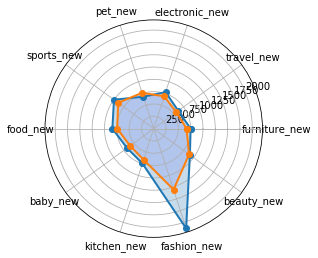

In [70]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title([F_678_Score.loc[2,"Name"]])
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)
#ax.plot(angles, median_stats, 'o-', linewidth=2)
#ax.fill(angles, median_stats,alpha=0.1)

ax.grid(True)

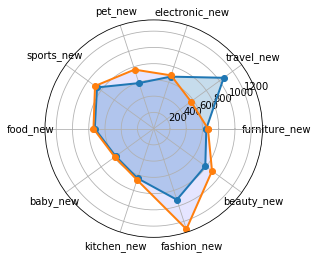

In [71]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats2, 'o-', linewidth=2)
ax.fill(angles, stats2, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title([F_678_Score.loc[2,"Name"]])
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)
#ax.plot(angles, median_stats, 'o-', linewidth=2)
#ax.fill(angles, median_stats,alpha=0.1)

ax.grid(True)